# Otsu algorithm

Import the necessary libraries

In [24]:
import math              
import numpy as np       
from matplotlib import pyplot as plt   
from PIL import Image 

In order to implement the algorithm, we are gonna use a dictionary to store the threshold values for each pixel intensity, and a histogram list.

In [25]:
threshold_values = {}
threshold_values_between = {}
h_list = [1]

Also, we need to load the image, convert it to grayscale and then save it as a numpy array.

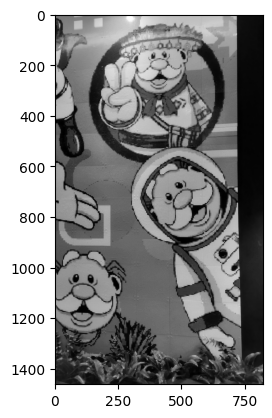

In [26]:
image=Image.open("img.jpg").convert("L")
image_numpy = np.asarray(image)
plt.imshow(image_numpy, cmap='gray')



Now, we are gonna compute the histogram of the image. Then, we are going to save it in the variable H_list-

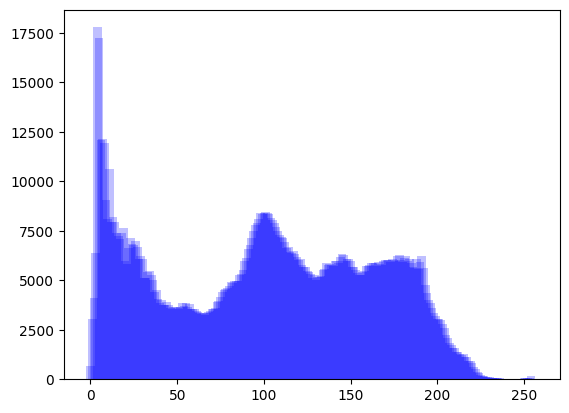

In [27]:
row, col = image_numpy.shape
    
y = np.zeros(256)
    
for i in range(0, row):
    for j in range(0, col):
        y[image_numpy[i, j]] += 1
    
# Plot the histogram
x = np.arange(0, 256)  
plt.bar(x, y, color='b', width=5, align='center', alpha=0.25)  
plt.show()  
    
h_list = y

We want to maximize the variance between the classes, and minimize the in-class variance.
A class is a set of pixels belonging to a region.



Also, to implement the method it is necessary to count pixels in the histogram

In [28]:
def countPixel(h):
    c = 0
    for i in range(0, len(h)):
        if h_list[i] > 0:
           c += h_list[i]
    return c

We need to calculate the probabilities and the number of pixels

In [29]:
cnt = countPixel(h_list)
probabilities = h_list/cnt

In order to implement the Otsu's Method, we need to define some functions to calculate the class probabilities (q(t)), the class mean (u(t))  and the individual class variance.

In [38]:
def weight_pix(s, e):
    w = 0
    
    for i in range(s, e):
        w += h_list[i]
    return w

def mean_pix(s, e):
    m = 0
    w = weight_pix(s, e)

    for i in range(s, e):
        m += h_list[i] * i
    return m / float(w)

def variance_pix(s, e):
    v = 0
    m = mean_pix(s, e)
    w = weight_pix(s, e)

    for i in range(s, e):
        v += ((i - m) ** 2) * h_list[i]/w
    return v

Finally, we are going to calculate the variance, weight and mean for the background and foreground class.

In [39]:


# Loop through each possible threshold value from 1 to 255 (as h has 256 bins, one for each intensity level)
for i in range(1, len(h_list)):

    # Compute the variance, probabilities, and mean for the "background" class
    v_back = variance_pix(0, i)
    w_back = weight_pix(0, i) / float(cnt)
    m_back = mean_pix(0, i)
    
    # Compute the variance, probabilities, and mean for the "foreground" class 
    v_fore = variance_pix(i, len(h_list))
    w_fore = weight_pix(i, len(h_list)) / float(cnt)
    m_fore = mean_pix(i, len(h_list))
   
    # Compute within-class variance (within_variance) 
    within_variance = w_back * (v_back) + w_fore * (v_fore)
    
    # Compute between-class variance (between_variance) 
    between_variance = w_back * w_fore * (m_back - m_fore)**2
        
          
    if not math.isnan(within_variance):
        threshold_values[i] = within_variance

    if not math.isnan(between_variance):
        threshold_values_between[i] = between_variance

Then, we are going to select the threshold which minimize the within classes variance.

In [33]:
min_within_variance = min(threshold_values.values())
optimal_threshold = [k for k, v in threshold_values.items() if v == min_within_variance]
print('optimal threshold', optimal_threshold[0])
optim_threshold = optimal_threshold[0]



optimal threshold 94


Now, let´s calculate the optimal threshold that maximizes the between class variance:


In [34]:
max_within_variance_between = max(threshold_values_between.values())
optimal_threshold = [k for k, v in threshold_values_between.items() if v == max_within_variance_between]
print('optimal threshold', optimal_threshold[0])
optim_threshold_between = optimal_threshold[0]

optimal threshold 94


Finally, we are going to restore the picture using the calculated optimal threshold

In [35]:
row, col = image_numpy.shape 
y = np.zeros((row, col))
for i in range(0, row):
    for j in range(0, col):
        if image_numpy[i, j] >= optim_threshold:
            y[i, j] = 255
        else:
            y[i, j] = 0
result = y

We plot the result, and save the image for the future activities.

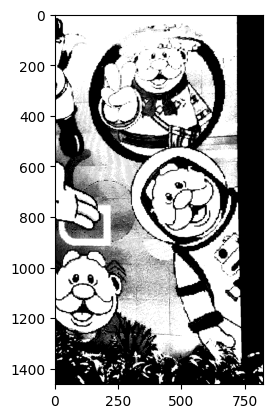

In [37]:
plt.imshow(result, cmap='gray')
plt.savefig("otsu.jpg")

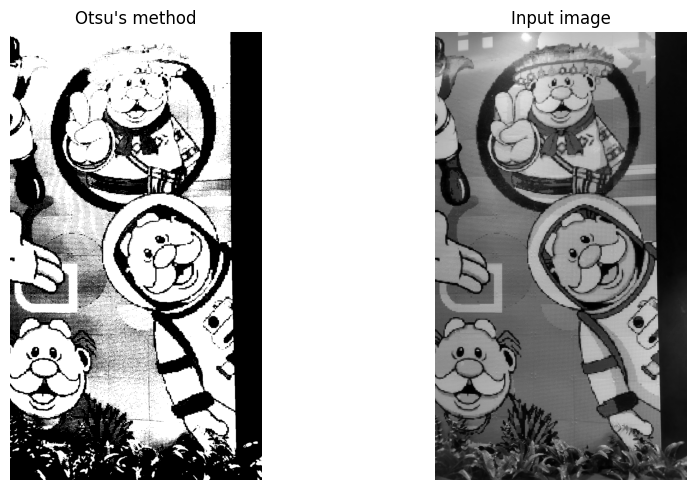

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(result, cmap='gray')
axs[0].set_title("Otsu's method")
axs[0].axis('off')  

axs[1].imshow(image_numpy, cmap='gray')
axs[1].set_title("Input image")
axs[1].axis('off')  

# Show the figure
plt.tight_layout()
plt.show()